# Bruno Morgado
HW4
<br> RIN: 661995422


Question 1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import numpy as np
from skimage import io
from matplotlib import pyplot as plt  
import copy

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


Extracting data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Plotting an image from each category

In [3]:
"""This plot finds an index for each of the types of images """

indeces = []

for label in range(10):
    iter = 0
    while y_train[iter] != label and iter<(y_train.size-1):
        iter += 1
    indeces.append(iter)

print(indeces)

[29, 4, 6, 9, 3, 27, 0, 7, 8, 1]


Plotting images

<Figure size 640x480 with 0 Axes>

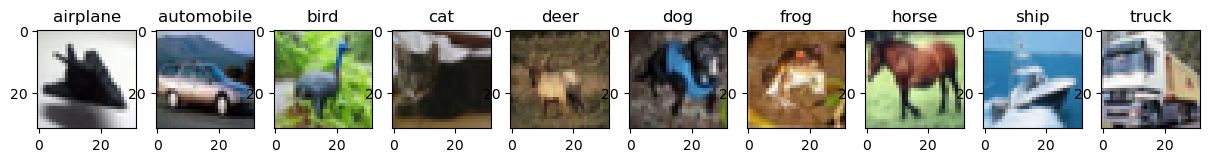

In [4]:
plt.figure()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, ax = plt.subplots(1,10, figsize=(15,10))

for label in range(10):
    ax[label].imshow(x_train[indeces[label]])
    ax[label].title.set_text(label_names[label])

plt.show()

Reshaping the images for a fully connected NN

In [5]:
print(x_train.shape)
print(x_train.shape[0])

x_train = x_train.reshape(50000, -1)
print(x_train.shape)
print(x_train)

# Convert the target data into one-hot encoding
y_train = to_categorical(y_train, 10)


(50000, 32, 32, 3)
50000
(50000, 3072)
[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [ 35 178 235 ...  12  31  50]
 [189 211 240 ... 195 190 171]
 [229 229 239 ... 163 163 161]]


In [6]:

def create_nn(n_layers, learn_rate):
    """ This function will be the function used for tuning the number of layers as a hyper param

    Args:
        n_layers (_type_): _description_

    Returns:
        _type_: _description_
    """
    model = Sequential()
    model.add(Input(shape=(3072,)))
    for n in range(n_layers):
        model.add(Dense(2**(n_layers - n + 4), activation="relu")) #adds layers with decreaseing size
                                              #with number of neurons in higher powers of 2
                                              #the smallest layer has 2^5 or 32 neurons
    
    model.add(Dense(10, activation="softmax"))

    optimizer = Adam(learning_rate=learn_rate)
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    model.summary()
    return model


In [ ]:
n_layers = [4, 5, 6]
learn_rates = [0.001, 0.0005]

accuracy = 0
opt_n = 0
opt_rate = 0
for n in n_layers:
    for rate in learn_rates:
        model = create_nn(n, rate)
        fit = model.fit(x_train, y_train, epochs=10,
                    batch_size=100, validation_split=0.3)
        if fit.history['accuracy'][-1] > accuracy:
            accuracy = fit.history['accuracy'][-1]
            opt_n = n
            opt_rate = rate
            opt_model = copy.deepcopy(model)
            opt_fit = copy.deepcopy(fit)
        
        del model
        del fit



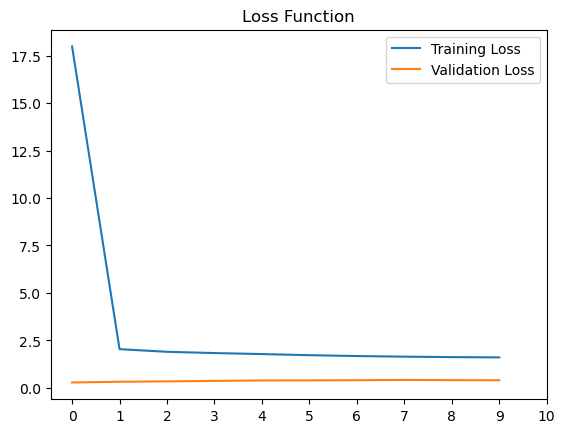

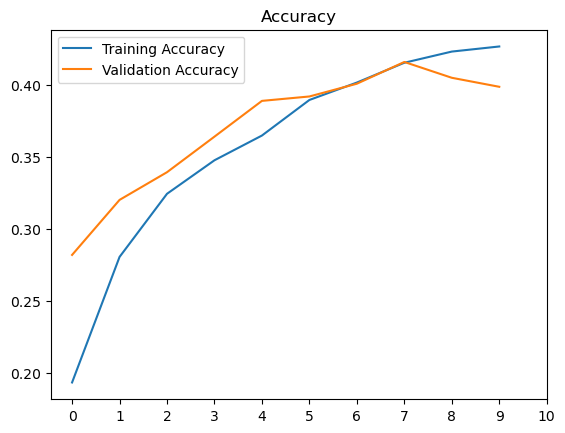

In [20]:
plt.figure()

plt.plot(opt_fit.history['loss'], label = "Training Loss")
plt.plot(opt_fit.history['val_accuracy'],label = "Validation Loss")
plt.legend()
plt.xticks(range(11))
plt.title("Loss Function")

plt.show()


plt.figure()

plt.plot(opt_fit.history['accuracy'], label = "Training Accuracy")
plt.plot(opt_fit.history['val_accuracy'],label = "Validation Accuracy")
plt.legend()
plt.xticks(range(11))
plt.title("Accuracy")

plt.show()

Question 2

In [58]:
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.regularizers import L2
from sklearn.preprocessing import MinMaxScaler


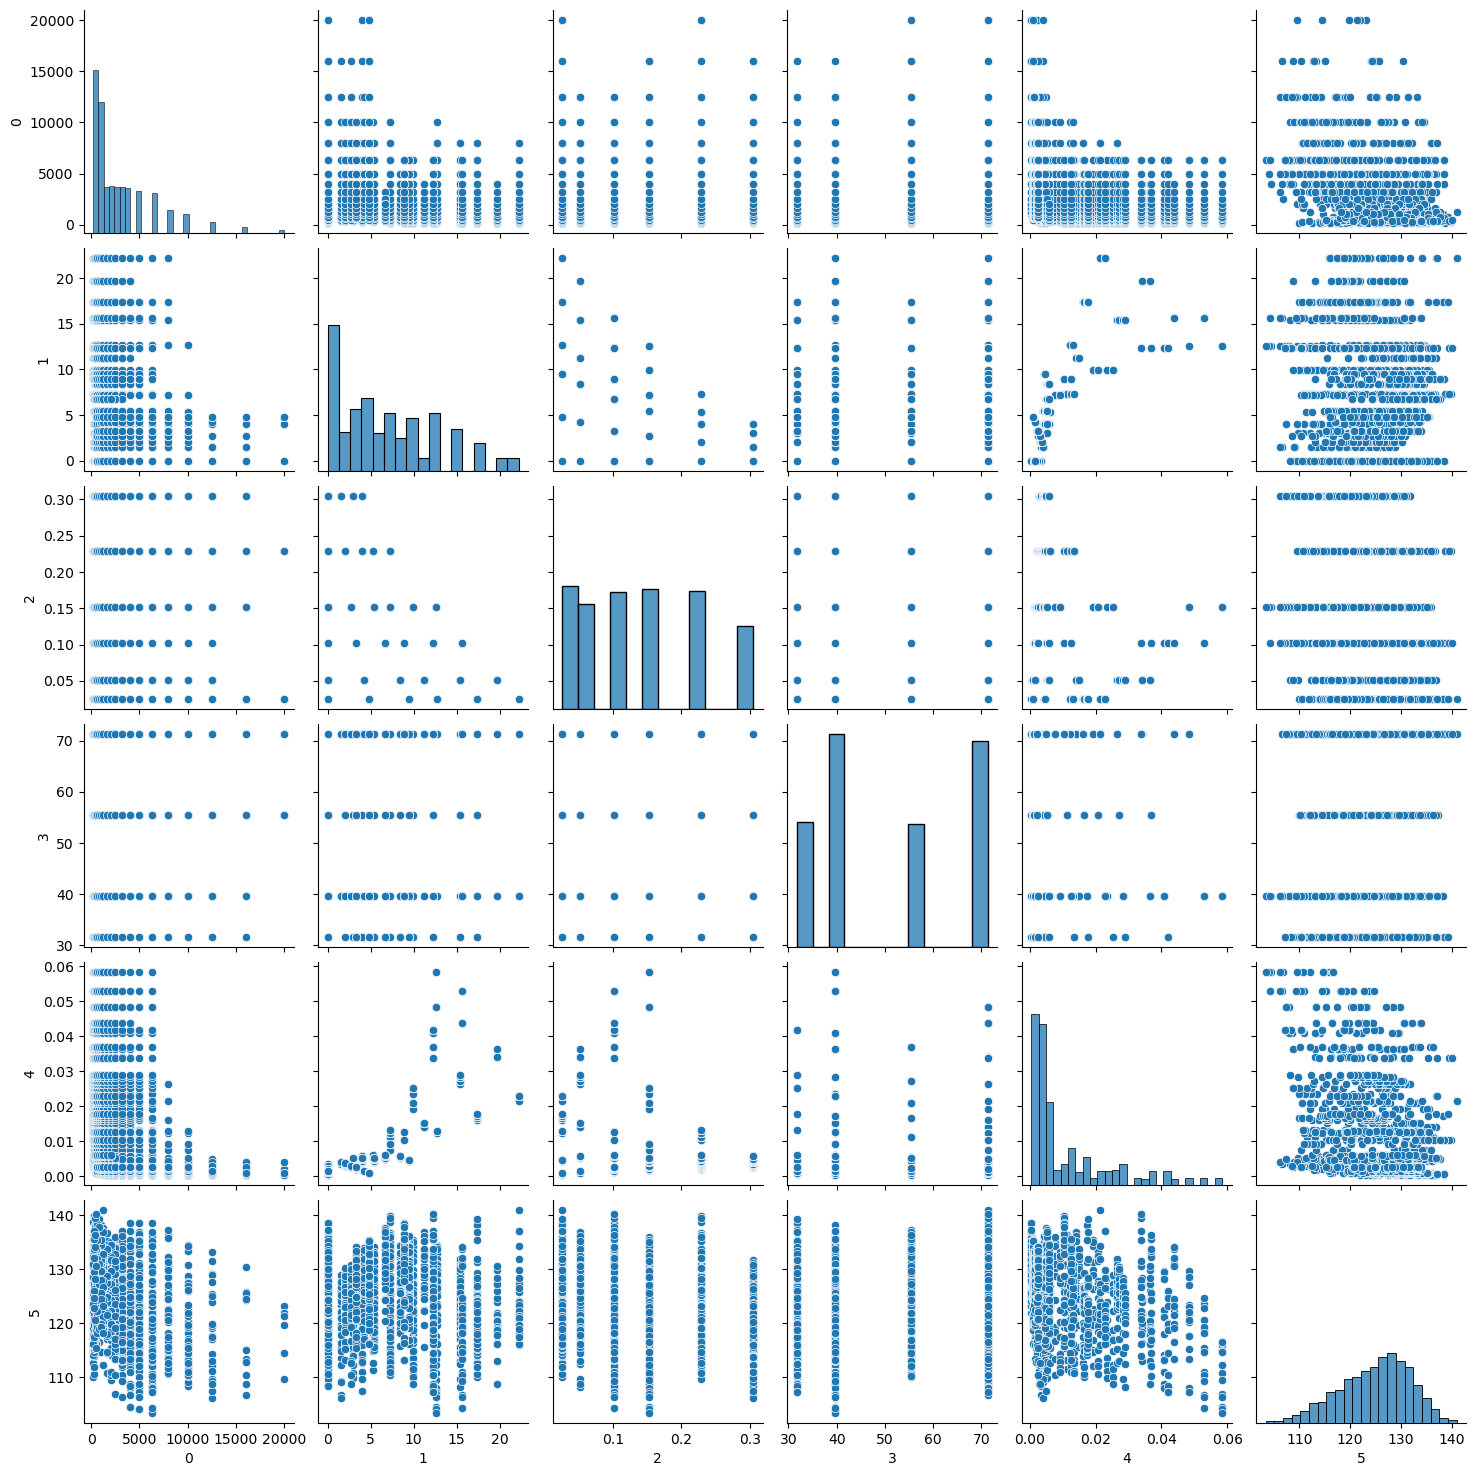

In [2]:
df = pd.read_csv('airfoil_self_noise.dat', sep="\t",header=None )
sns.pairplot(df)

In [60]:
# Data Preparation
df = pd.read_csv('airfoil_self_noise.dat', sep="\t",header=None )
display(df)

y = df.iloc[:, -1]
y = np.asmatrix(y)
y = y.T
print(y.shape)

minmax = MinMaxScaler()
X = df.iloc[:, :-1]
X = np.asarray(X)
X = minmax.fit_transform(X)
print(X)
print(X.shape)

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


(1503, 1)
[[0.03030303 0.         1.         1.         0.03900472]
 [0.04040404 0.         1.         1.         0.03900472]
 [0.0530303  0.         1.         1.         0.03900472]
 ...
 [0.19191919 0.7027027  0.27272727 0.19949495 0.90411066]
 [0.24242424 0.7027027  0.27272727 0.19949495 0.90411066]
 [0.30808081 0.7027027  0.27272727 0.19949495 0.90411066]]
(1503, 5)


In [126]:
model = Sequential()
model.add(Input(shape=(5,)))
model.add(Dense(14, activation="linear"))
model.add(Dense(1, activation="elu"))
# Add output layer
model.add(Dense(1, activation="linear"))

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
                loss='mean_squared_error',
                metrics=[keras.metrics.R2Score()])
model.summary()


Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 14)                84        
                                                                 
 dense_223 (Dense)           (None, 1)                 15        
                                                                 
 dense_224 (Dense)           (None, 1)                 2         
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
fit = model.fit(X, y, epochs=1500,
                    batch_size=1000, validation_split=0.3)

In [128]:
print("train R2 Score: ", fit.history['r2_score'][-1])
print("test R2 Score: ", fit.history['val_r2_score'][-1])

train R2 Score:  0.5566079616546631
test R2 Score:  0.4110473394393921
